# TP3 Euler Explicite

L'objectif du TP est de comprendre et de savoir coder la méthode d'Euler dans différents cas.

<UL><li>
Temps initial $t_{0}$, donnée initiale $x(t_0)$, temps final $T$, le nombre de pas de temps $N$, terme source $f$
<li>Approximation de la fonction $x$ solution du problème de Cauchy $$\left\{\begin{array}{l}\dot{x}(t) = f(t,x(t)),\\ x(t_0)= x_0\end{array}\right.$$
    <li> Calculer le pas de temps $dt=T/N$
<li>
  $x_0 = x(t_0)$;
  
<li>Pour $n$ allant de 0 à $N-1$ faire
   <UL><li> $x_{n+1} = x_n + dt~ f(t_n,x_n)$;
  <li> $t_{n+1} = t_n + dt$;
  </UL>
</UL>

Du côté de l'implémentation, on se concentrera sur deux aspects : 
- **visualiser** correctement les comportements des solutions
- utiliser de façon adéquate les **outils** de numpy (np.array, ...)

---------------------------

Nous commençons par importer les différents packages python dont nous aurons besoin:
- numpy (gestion des tableaux et calcul scientifique)
- matplotlib.pyplot (gestion des graphiques)
- scipy.integrate.odeint (solveur d'équations différentielles "boite noire") [[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)]

In [1]:
import numpy as np # gestion des tableaux et calcul scientifique
import matplotlib.pyplot as plt # gestion des graphiques
from scipy.integrate import odeint # solveur d'équations différentielles "boite noire"
# à compléter avec les autres packages si besoin

## Prélude : Visualiser plusieurs figures sur un même graphe

On cherche ici à motiver rapidement l'utilisation de matplotlib pour visualiser des données, et en particulier à explorer l'utilisation de la fonction (bien pratique) **plt.subplots**. L'exercice est directement tiré de la [documentation officielle](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html).


NB : Pour se convaincre des possibilités de la librairie **matplotlib.pyplot** utilisée, on peut regarder la [gallerie des figures disponibles](https://matplotlib.org/3.1.0/gallery/) !

In [2]:
# Créér un tableau de réels linéairement espacés sur [0, 5]
x = np.linspace(0, 5, 500)      # indice : regarder np.linspace

# Créér trois tableaux contenant respectivement les valeurs de :
# la fonction x --> sin( (x*pi)**2 )
# la fonction x --> exp(x)
# la fonction x --> sin( (x*pi)**2 )*exp(x)
y1 = np.sin( (x*np.pi) ** 2)              # indice : regarder np.sin
y2 = np.exp(x)                   # indice : regarder np.exp
y3 = y1 * y2              

On va maintenant observer le comportement des fonctions, séparément ou ensemble. Répondez aux questions suivantes :
- en changeant les valeurs de <cite><font color="green">figsize</font></cite>, déterminez à quel axe (horizontal ou vertical) correspond la première valeur.
- en comparant les figures, en déduire la signification des deux premiers arguments $n_{1}$, $n_{2}$ dans plt.subplots($n_{1}$, $n_{2}$).
- quel est l'intérêt de préciser <cite><font color="green">sharey=True</font></cite> ?
- quel est l'intéret de lier deux axes avec <cite><font color="green">ax.twinx</font></cite> ?

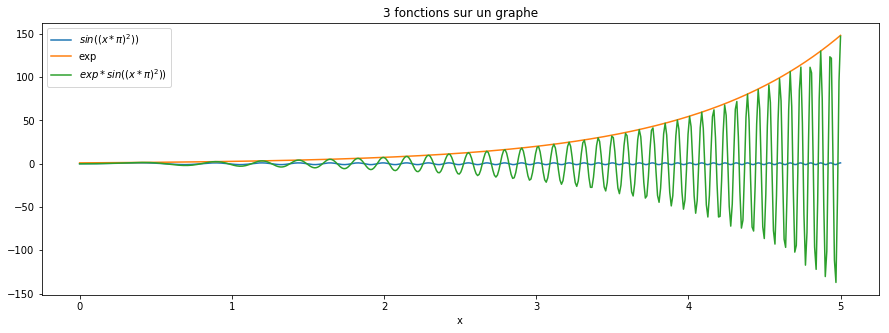

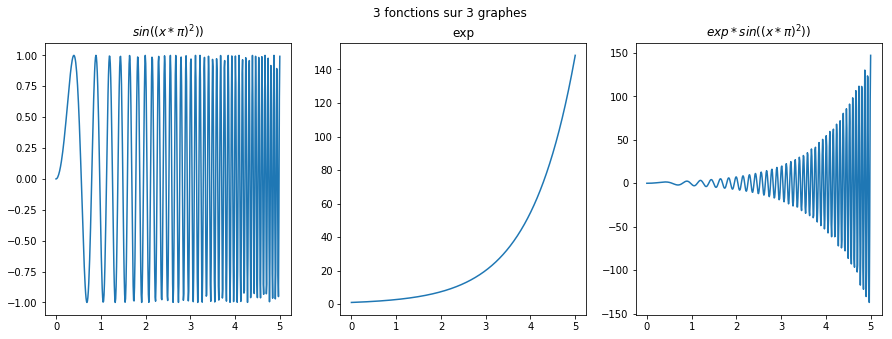

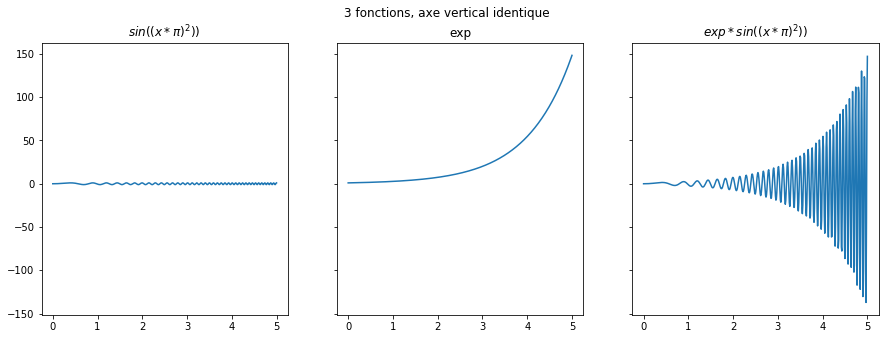

In [3]:
# Version 1 : tout sur le même graphe
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y1, label=r'$sin((x * \pi)^{2}))$')
ax.plot(x, y2, label=r'exp')
ax.plot(x, y3, label=r'$exp*sin((x * \pi)^{2}))$')
ax.set_xlabel('x')
plt.title('3 fonctions sur un graphe')  
ax.legend()
plt.show()

# Version 2 : chacun sur un graphe différent, en ligne
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # observez l'effet des valeurs de figsize
ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
fig.suptitle('3 fonctions sur 3 graphes')          # un titre pour l'ensemble de la figure ...
ax1.set_title(r'$sin((x * \pi)^{2}))$')     # ... puis un titre pour chaque sous figure
ax2.set_title(r'exp')
ax3.set_title(r'$exp*sin((x * \pi)^{2}))$')
plt.show()

# Version 3 : chacun sur un graphe différent (en ligne), axe vertical partagé
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  
# notez qu'on peut ne pas préciser le tuple d'axes en question, et s'y référer comme un tableau (ici, à 3 entrées)
ax[0].plot(x, y1)
ax[1].plot(x, y2)
ax[2].plot(x, y3)
fig.suptitle('3 fonctions, axe vertical identique')
ax[0].set_title(r'$sin((x * \pi)^{2}))$')          # ... puis un titre pour chaque sous figure
ax[1].set_title(r'exp')
ax[2].set_title(r'$exp*sin((x * \pi)^{2}))$')
plt.show()

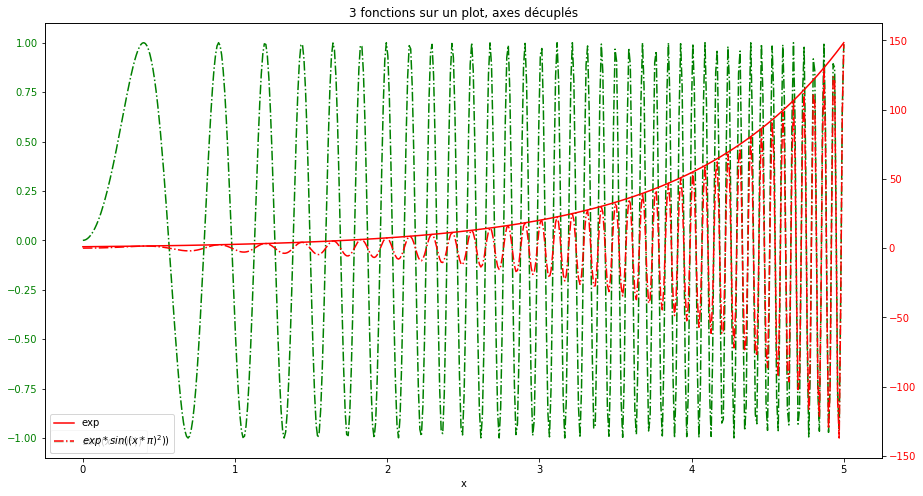

In [4]:
# Un exemple pour la route de visualisation plus complexe :
fig, ax = plt.subplots(figsize=(15, 8))  

ax.plot(x, y1, linestyle='-.', color='g', label=r'$sin((x * \pi)^{2}))$')
ax2 = ax.twinx()                              # on crée un deuxième plot, mais qui reste lié au premier
ax2.plot(x, y2, linestyle='-', color='r', label='exp')
ax2.plot(x, y3, linestyle='-.', color='r', label=r'$exp*sin((x * \pi)^{2}))$')

ax.set_xlabel('x')
ax.tick_params(axis='y', labelcolor='g')      # on ajoute la couleur de nos courbes sur l'axe vertical (pour la lisibilité)
ax2.tick_params(axis='y', labelcolor='r')     # on ajoute la couleur de nos courbes sur l'axe vertical (pour la lisibilité)

plt.title('3 fonctions sur un plot, axes décuplés')     # ou comme précédemment (car il n'y a qu'un plot) : fig.suptitle()
ax.legend(loc=0)
ax2.legend(loc=3)

plt.show() 

_Répondre aux questions ici_:
- On observe que <cite><font color="green">figsize</font></cite> permet de calibrer la taille de l'image affichée, le couple $(s_{1}, s_{2})$ affichant un longueur horizontale $s_{1}$ (_width_) et une longueur verticale $s_{2}$ (_height_). Par défaut, ces tailles sont exprimées en inches.
- La fonction plt.subplots($n_{1}$, $n_{2})$ crée un tableau de $n_{1}$ lignes et $n_{2}$ colonnes qui correspondent à autant de figures que l'on va y placer. Pour créer une ligne de 3 figures il faudra écrire plt.subplots(1, 3), et pour tracer quatre figures en carré on choisira plutôt plt.subplots(2, 2).
- Par défaut, les figures ajustent automatiquement leurs axes au contenu tracé : il n'y a donc pas de raisons que plusieurs plots aient les mêmes unités (verticales souvent). L'option <cite><font color="green">sharey=True</font></cite> permet de s'assurer que tout les graphiques ont une même échelle d'axe vertical.
- Lorsque l'on veut observer qualitativement des courbes qui ont des échelles différentes sur un même graphique, il faut adapter les échelles ! On peut le faire en créant (artificiellement) un deuxième axe sur la même figure via la fonction <cite><font color="green">ax2 = ax.twinx()</font></cite>, et ainsi préciser séparément les échelles choisies.

# Exercice 1

Nous considérons une équation d’évolution, de type croissance/décroissance exponentielle. Cela peut modéliser le nombre d’individus d’une population, ou la décroissance de la masse d’un élément
radioactif. Le problème de Cauchy est le suivant, où $a$ est un réel fixé :
$$\left\{\begin{array}{l}\dot{x}(t) = ax(t),\\ x(t_0)=x_0\end{array}\right.$$

a) Donner l'expression de la fonction $f:\mathbb{R}\times \mathbb{R}\rightarrow \mathbb{R}$ pour cet exemple. Programmer la fonction $f$.  On définira $a$ à l'extérieur de la fonction. Dans la suite du TP, on prendra $a = 3$ ou $a = −2$.

In [5]:
def f(x, t):
    y = a * x
    return y

b) Donner la solution exacte de cette équation, en utilisant la méthode de séparation des variables.
Votre solution doit être tapée en LaTeX ci-dessous:

Conseil: si besoin, utiliser un [éditeur Latex en ligne](https://www.codecogs.com/latex/eqneditor.php).

$x(t)=x_{0}\exp(a(t-t_{0}))$

c) Définir une fonction $solexa$ qui renvoie la solution exacte au temps $t$, connaissant la donnée initiale $x_{0}$. 

Conseil : On utilisera la librairie $numpy$. 

In [6]:
def solexa(t, t0, x0):
    x = x0 * np.exp(a * (t - t0))
    return x

Le code ci-dessous doit afficher votre solution exacte pour a=3. Modifiez-le de manière à afficher deux graphes (en utilisant plt.subplot) avec à gauche, la solution pour a=3, à droite la solution pour a=-2.


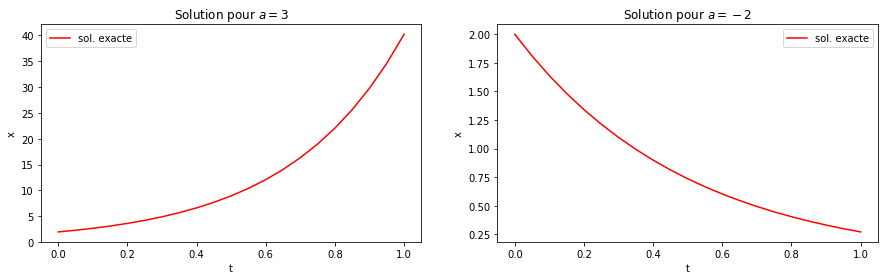

In [7]:
# votre code ci-dessous
x0 = 2.
T = 1.
t0 = 0.
N = 20
dt = T / N
timepoints = np.linspace(0, T, N+1)
a = 3.
X1_exact = solexa(timepoints, t0, x0)
a = -2
X2_exact = solexa(timepoints, t0, x0)

# Crée une figure avec deux emplacements (1 ligne, 2 colonnes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(timepoints, X1_exact, 'r',label='sol. exacte')
ax1.legend()
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.set_title('Solution pour $a=3$')

ax2.plot(timepoints, X2_exact, 'r',label='sol. exacte')
ax2.legend()
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title('Solution pour $a=-2$')

plt.show()

d) Compléter la  fonction $EulerExplicite$ ci dessous pour calculer une solution approchée par la méthode d'Euler explicite. La fonction renvoie le vecteur $X= (x_0,\ldots ,x_N)$ et $TPS= (t_0,\ldots ,t_N)$, où $t_N = T$ (que vaut $N$ en fonction de $T$ et de $dt$ ?). 

Conseil : On utilisera la librairie $numpy$ pour créer et manipuler les vecteurs de réels $X$ et $TPS$. 

In [8]:
def EulerExplicite(t0, x0, T, N, f):
    """
    :param t0: temps de condition initiale (réel)
    :param x0: condition initiale (vecteur ligne ou réel)
    :param T: temps final d'intégration (réel)
    :param N: nombre de pas de temps (entier)
    :param f: fonction membre de l'ODE (doit renvoyer un vecteur ligne)
    :return: (TPS, X)
    """

    # TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    # X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    # si x0 est un reel on le convertit en vecteur ligne de taille 1
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
        
    # initialisation
    t_start = t0
    x_start = x0
    TPS = np.empty(N+1)            # on crée un vecteur vide de taille N+1 prêt à accueillir les valeurs de temps
    X = np.empty((N+1, len(x0)))   # on crée un vecteur vide de taille (N+1, taille(X0)) prêt à accueillir les valeurs de solutions
    TPS[0] = t0                    # on stock les valeurs de départ
    X[0] = x0                      # on stock les valeurs de départ
    dt = T / N
    for i in range(1, N+1):
        # calcul de la solution au temps suivant
        t_next = t_start + dt
        x_next = x_start + dt * f(x_start, t_start)
        
        # stockage des resultats
        TPS[i] = t_next
        X[i] = x_next
        
        # actualisation des valeurs pour la prochaine itération
        t_start = t_next
        x_start = x_next      
    return TPS, X.squeeze()

e) Appeler la fonction pour $x_0 = 2$, $t_0 = 0$, $T = 1$,  $N=20$ et $a=3$. 

Tracer sur un même graphe la solution exacte, la solution approchée avec la méthode d'Euler explicite, et la solution approchée obtenue avec scipy.integrate.odeint (regarder les exemples d'utilisation de cette fonction dans les deux TP précédents). Ajouter à la figure un titre, des noms sur les axes, et une légende. Reprendre la question pour $a=-2$.

Conseil: on pourra, si l'on veut, utiliser la fonction <cite><font color="green">scatter()</font></cite> de pyplot de façon à visualiser les solutions numériques.

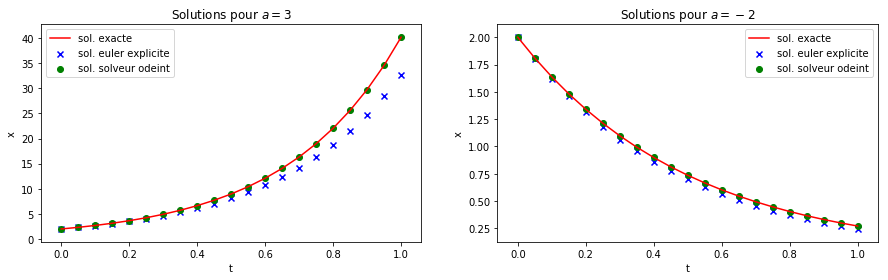

In [9]:
# Pour la condition initiale a = 3
a = 3
timepoint1, X1_euler = EulerExplicite(t0=0., x0=2., T=1., N=20, f=f)
X1_exact = solexa(timepoint1, t0, x0)
X1_odeint = odeint(func=f, y0=2., t=timepoint1)

a = -2
timepoint2, X2_euler = EulerExplicite(t0=0., x0=2., T=1., N=20, f=f)
X2_exact = solexa(timepoint2, t0, x0)
X2_odeint = odeint(func=f, y0=2., t=timepoint2)

# Crée une figure avec deux emplacements (1 ligne, 2 colonnes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

ax1.plot(timepoint1, X1_exact, 'r',label='sol. exacte')
ax1.scatter(timepoint1, X1_euler, marker='x', color='b',label='sol. euler explicite')
ax1.scatter(timepoint1, X1_odeint, marker='o', color='g',label='sol. solveur odeint')
ax1.legend()
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.set_title('Solutions pour $a=3$')

ax2.plot(timepoint2, X2_exact, 'r',label='sol. exacte')
ax2.scatter(timepoint2, X2_euler, marker='x', color='b',label='sol. euler explicite')
ax2.scatter(timepoint2, X2_odeint, marker='o', color='g',label='sol. solveur odeint')
ax2.legend()
ax2.set_xlabel('t')
ax2.set_ylabel('x')
ax2.set_title('Solutions pour $a=-2$')

plt.show()

f) Etude qualitative : que se passe t-il quand on prend des discrétisations de plus en plus fines ? On pourra par exemple écrire un programme qui affiche la solution exacte et les solutions obtenues par la méthode d'Euler explicite avec des couleurs différentes pour différentes valeurs de  $N$. Comparer le comportement pour $a>0$ et $a<0$.

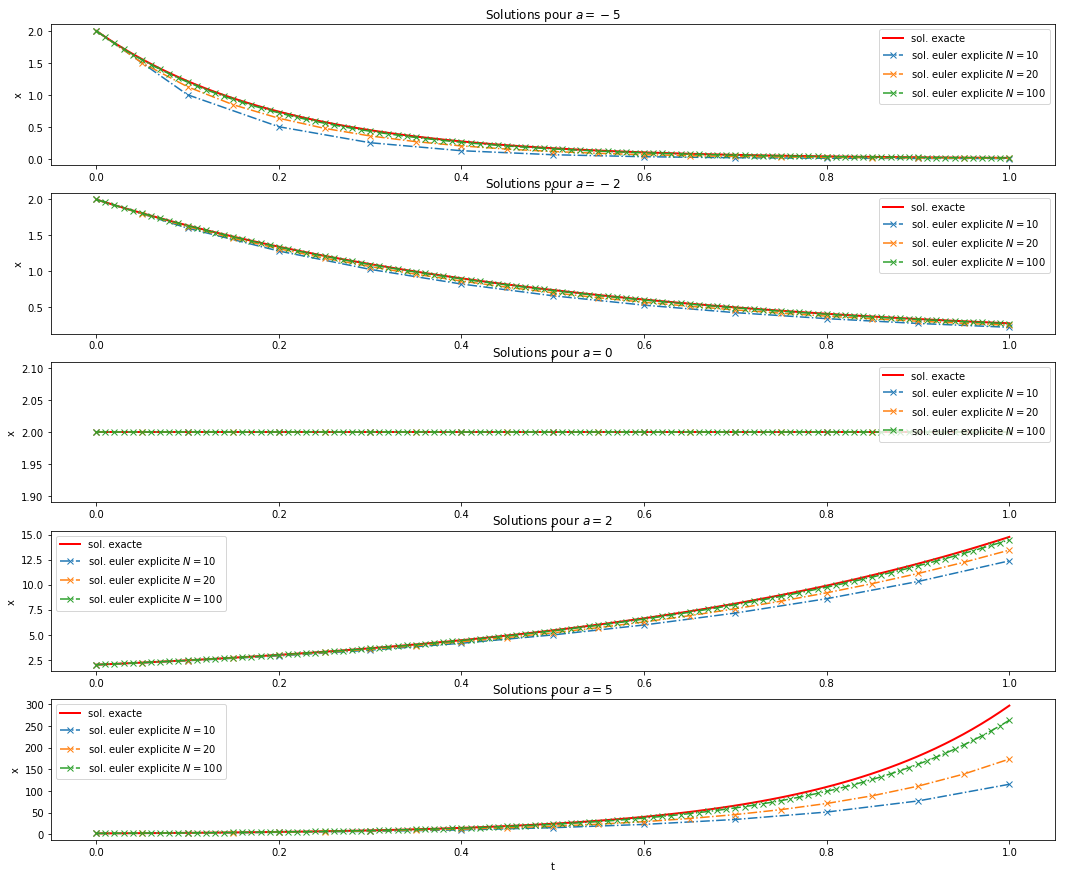

In [10]:
# Choisir l'évolution selon le nombre de points pris (précision temporelle)
N_ = [10, 20, 100]
a_ = [-5, -2, 0, 2, 5]
x0 = 2.
t0 = 0.
timepoint = np.linspace(0., 1., 100)
fig, axs = plt.subplots(len(a_), 1, figsize=(18, 15))

for i, a in enumerate(a_):
    X_exact = solexa(timepoint, t0, x0)
    
    axs[i].plot(timepoint, X_exact, 'r', linewidth = 2., label='sol. exacte')
    for N in N_:
        tpt, X_euler = EulerExplicite(t0=t0, x0=x0, T=1., N=N, f=f)
        axs[i].plot(tpt, X_euler, '-.x', label='sol. euler explicite $N={}$'.format(N))
    axs[i].legend()
    axs[i].set_xlabel('t')
    axs[i].set_ylabel('x')
    axs[i].set_title('Solutions pour $a={}$'.format(a))

plt.show()

Vos observations ici (cellule de type texte):

<cite><font color="red">Remarque </font></cite>: Quand on prend $dt$  plus petit, la solution approchée se rapproche
de la solution exacte. Numériquement, on constate que le schéma semble converger: quand
$dt$ tend vers 0, la courbe de la solution approchée «se colle» à la courbe de la solution exacte:
 $$ \displaystyle \max_{0 \leq j \leq N} ~ |\underbrace{x_{j}}_{\text{sol. approchée} \atop \text{ au temps } t_{j}}- \underbrace{x(t_{j})}_{\text{sol. exacte} \atop \text{ au temps } t_{j}}| \underset{\Delta t \rightarrow 0}{\longrightarrow} 0. $$
 
On observe que quand le pas de temps diminue, l'erreur diminue également, d'un facteur qui semble proportionnel (on verra cette observation dans la manip suivante) 

g) Etude quantitative de l'erreur :  Ecrire une fonction "erreur" qui calcule $$E(N)=\max_{i=0,\ldots,N}|x(t_i)−x_i|,$$ où $x$ est la solution exacte et $x_i$ est l’approximation fournie par la méthode d’Euler au temps $t_i$ (que vaut $N$ en fonction de $T$ et de $dt$ ?).

Appliquer la fonction erreur à $N$ prenant les valeurs $10^i$ pour $i=1,\ldots,5$. Afficher  les quantités calculées.

Commenter les résultats.


In [11]:
def erreur (t0, x0, T, N, f):
    """
    :param t0: temps de condition initiale (réel)
    :param x0: condition initiale (vecteur ligne ou réel)
    :param T: temps final d'intégration (réel)
    :param N: nombre de pas de temps (eniter)
    :param f: fonction membre de l'ODE (doit renvoyer un vecteur ligne)
    :return: maximum des erreurs en valeur absolue (norme infinie)
    """
    
    #calcul de la solution approchée
    timepoints, X_approx = EulerExplicite(t0, x0, T, N, f)
    #calcul de la solution exacte aux mêmes temps
    X_exact = solexa(timepoints, t0, x0)
    #calcul de l'erreur E
    error = np.max(np.abs(X_approx - X_exact))
    return float(error)

N_ = [10**(i+1) for i in range(5)]   # create list of powers of 10
print('Calcul des erreurs :')
for N in N_:
    E = erreur(t0, x0, T, N, f)
    print('  N={}| error = {:.3f}'.format(N, E))

Calcul des erreurs :
  N=10| error = 181.496
  N=100| error = 33.824
  N=1000| error = 3.675
  N=10000| error = 0.371
  N=100000| error = 0.037


h) Etude quantitative 2 : Tracer la courbe d’erreur $E(N)$ en fonction de $N$ pour les points suivants : 10,100,1000,10000,100000. On affichera le résultat en coordonnées logarithmiques. Superposer le graphe de la fonction f(N)=N. Commenter les résultats.

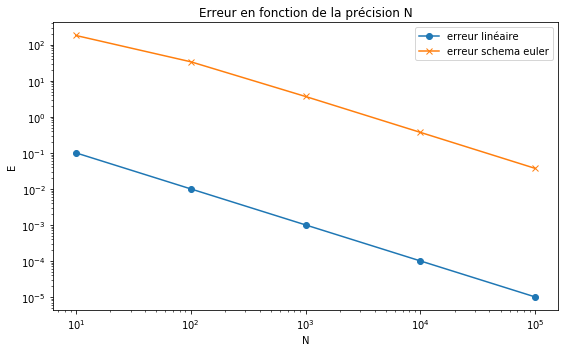

In [12]:
#exemple de graphique en échelle logarithmique
N_ = [10**(i+1) for i in range(5)]
E_ = []
dt_ = []
for N in N_:
    E = erreur(t0, x0, T, N, f)
    E_.append(E)
    dt_.append(T / N)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(N_, dt_, '-o', label='erreur linéaire')
ax.plot(N_, E_, '-x', label='erreur schema euler')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('E')
ax.legend(loc=0)
ax.set_title('Erreur en fonction de la précision N')
plt.tight_layout()
plt.show()

<cite><font color="red">Remarques </font></cite>: 
1. On observe que le comportement de l'erreur au temps final en fonction du pas de temps est linéaire, puisqu'elle est parallèle à la droite de pente 1 (qui est le graphe de la fonction f(dt)=dt). 
2. On aurait pu voir ce comportement linéaire en coordonnées cartésiennes mais l'intérêt des coordonnées logarithmiques est qu'on distingue bien les différents pas de temps testés, même très petits.

# Exercice 2. 

Nous considérons l’équation différentielle d’ordre 2 suivante
$$\left\{\begin{array}{l}\ddot{x}(t) = -x(t),\\ x(0)=a_0\\ \dot x(0)=a_1\end{array}\right.$$

NB: Nous testerons avec $T = 5$ et $T = 4\pi$.

a) Mettre l’équation proposée sous la forme d’un système différentiel d’ordre 1 d’inconnue : $X=\begin{pmatrix} x\cr \dot x\end{pmatrix}$.

$\left\{\begin{matrix}
\dot{X}=\underbrace{\bigl(\begin{smallmatrix}
0 & 1 \\ 
-1 & 0
\end{smallmatrix}\bigr)}_{\text{A}}X\\ 
X(0) = \begin{pmatrix}
a_{0}\\ 
a_{1}
\end{pmatrix}
\end{matrix}\right.$

b) Quelle est la solution exacte de cette équation différentielle ? Ecrire une fonction $solexa2(t,a0,a1)$ renvoyant $x(t)$ et $\dot x(t)$. 

$x(t)=a_{0} \cdot cos(t) + a_{1} \cdot sin(t)$

In [13]:
def solexa2(t, a0, a1):
    x = a0 * np.cos(t) + a1 * np.sin(t)
    xdot = -a0 * np.sin(t) + a1 * np.cos(t)
    return x, xdot

c) Completer la fonction $plotsol2(t,X)$ qui trace sur la même figure la position en fonction du temps dans le cadre de gauche, la vitesse en fonction du temps dans le cadre du milieu, et la vitesse en fonction de la position (espace des phases) dans le cadre de droite. $t$ contient les temps discrétisés, $X$ contient les vecteurs (position,vitesse) correspondants. Penser à mettre des labels d'axes aux graphes


In [14]:
def plotsol2(t, X):
    # on commence par creer deux listes positions vitesses
    pos = X[0]
    vit = X[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # le graphe de la position en fonction du temps
    ax1.plot(t, pos,label='sol exacte')
    ax1.set_xlabel('temps')
    ax1.set_ylabel('position')
    ax1.set_title('Position en fonction du temps')
    ax1.legend()
    
    # le graphe de la vitesse en fonction du temps
    ax2.plot(t,vit,label='sol exacte')
    ax2.set_xlabel('temps')
    ax2.set_ylabel('vitesse')
    ax2.set_title('Vitesse en fonction du temps')
    ax2.legend()
    
    #le graphe dans l'espace des phases
    ax3.plot(pos, vit, label='sol exacte')
    ax3.set_xlabel('position')
    ax3.set_ylabel('vitesse')
    ax3.set_title('Espace des phases')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

d)  Tester la fonction plotsol2 sur la solution exacte pour  $a_0 = 1$, $a_1 = 1$, $T = 4 \pi$,  et $dt=0.05$ 

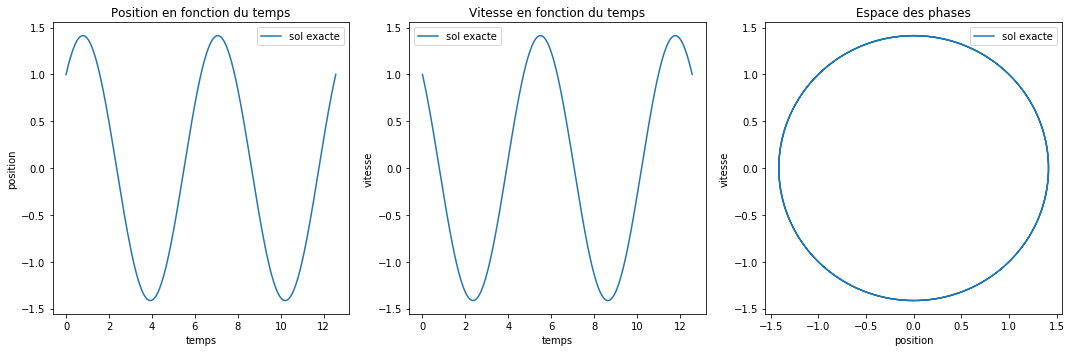

In [15]:
a0 = 1.
a1 = 1.
T = 4 * np.pi
dt = 0.05
N = int(T / dt)
t = np.linspace(0, T, N+1)
X = solexa2(t, a0, a1)
plotsol2(t, X)

e) Programmer la fonction second membre $f2(x,t)$ pour cet exemple, puis calculer la solution approchée de ce problème avec la méthode d'Euler. Attention maintenant $f2$ est une fonction vectorielle à deux composantes. Ainsi $f2(x,t)$ doit renvoyer soit une liste de 2 termes, soit un numpy array à 2 composantes. 

In [16]:
def f2(X, t):
    """
    :param X: vecteur (position, vitesse) (2 lignes)
    :param t: temps de condition initiale (réel)
    :return: vecteur second membre de l'équation
    """
    Y = np.asarray([X[1], -X[0]]) #la commande np.asarray force python à comprendre que Y est un tableau numpy
    return Y

f) En s'inspirant de la fonction plotsol2, écrire une fonction  qui trace sur le  même graphique à 3 fenêtres (position par rapport au temps, vitesse par rapport au temps, et graphe dans l'espace des phases), la solution exacte et celle calculée avec Euler explicite. Utiliser des couleurs différentes et mettre une légende.  Attention le tableau python contenant la solution numérique n'a pas forcément la même structure que celui de la solution exacte


In [17]:
def plotsol2_2(t, X_exact, X_EE):
    pos_exact = X_exact[0]
    vit_exact = X_exact[1]
    pos_euler = [x[0] for x in X_EE]
    vit_euler = [x[1] for x in X_EE]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # le graphe de la position en fonction du temps
    ax1.plot(t, pos_exact, c='r', label='sol exacte')
    ax1.plot(t, pos_euler, c='b', label='sol euler')
    ax1.set_xlabel('temps')
    ax1.set_ylabel('position')
    ax1.set_title('Position en fonction du temps')
    ax1.legend()
    
    # le graphe de la vitesse en fonction du temps
    ax2.plot(t, vit_exact, c='r', label='sol exacte')
    ax2.plot(t, vit_euler, c='b', label='sol euler')
    ax2.set_xlabel('temps')
    ax2.set_ylabel('vitesse')
    ax2.set_title('Vitesse en fonction du temps')
    ax2.legend()
    
    #le graphe dans l'espace des phases
    ax3.plot(pos_exact, vit_exact, c='r', label='sol exacte')
    ax3.plot(pos_euler, vit_euler, c='b', label='sol euler')
    ax3.set_xlabel('position')
    ax3.set_ylabel('vitesse')
    ax3.set_title('Espace des phases')
    ax3.legend()
    
    # Place a legend to the right of this smaller subplot.
    plt.tight_layout()
    plt.show()

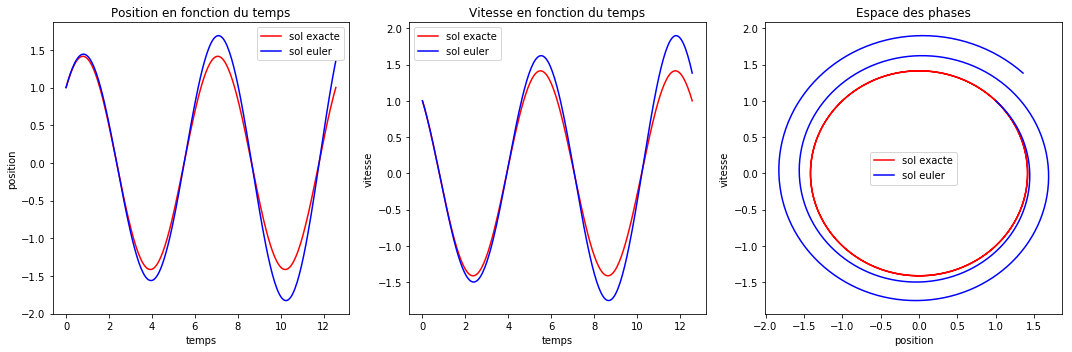

In [18]:
# arguments du plot
a0 = 1.
a1 = 1.
T = 4 * np.pi
X_init = np.array([a0, a1])
dt = 0.05
N = int(T / dt)
t = np.linspace(0, T, N+1)
TPS, XEE = EulerExplicite(t0, X_init, T, N, f2)
X = solexa2(t, a0, a1)
plotsol2_2(t, X, XEE)

g) Calculer une autre solution numérique avec le schéma d'Euler modifié obtenu en utilisation la formule du point milieu
$$y_{n+1}=y_n+hf\left(t_n+\frac{h}{2},y_n+\frac{h}{2}f(t_n,y_n)\right)$$

In [19]:
def ExplicitMidpoint(t0, x0, T, N, f):
    """
    :param t0: temps de condition initiale (réel)
    :param x0: condition initiale (vecteur ligne ou réel)
    :param T: temps final d'intégration (réel)
    :param N: nombre de pas de temps (eniter)
    :param f: fonction membre de l'ODE (doit renvoyer un vecteur ligne)
    :return: (TPS, X)
    """

    # TPS est un vecteur ligne contenant les (N+1) temps intermediaires (t0, ..., tN)
    # X a autant de colonnes que X0 et N+1 lignes; le résultat au temps ti est sur la ligne (i+1)
    
    # si x0 est un reel on le convertit en vecteur ligne de taille 1
    if np.size(x0)==1: 
        x0 = np.array([float(x0)])
        
    # initialisation
    t_start= t0
    x_start = x0
    TPS = np.empty(N+1)
    X = np.empty((N+1, len(x0)))
    TPS[0] = t0
    X[0] = x0
    dt = T / N
    for i in range(1, N+1):
        # calcul de la solution au temps suivant
        t_next = t_start + dt
        x_next = x_start + dt * f(x_start + dt / 2. * f(x_start, t_start), t_start + dt / 2.)
        # stockage des resultats
        TPS[i] = t_next
        X[i] = x_next
        
        # actualisation des valeurs 
        t_start = t_next
        x_start = x_next      
    return TPS, X.squeeze()

h) Tracer la nouvelle solution en plus de la solution exacte et de la solution Euler explicite, on pourra écrire une nouvelle fonction plotsol2_3. Commenter vos résultats

In [20]:
def plotsol2_3(t, X_exact, X_EE, X_EM):
    pos_exact = X_exact[0]
    vit_exact = X_exact[1]
    pos_euler = [x[0] for x in X_EE]
    vit_euler = [x[1] for x in X_EE]
    pos_midpoint = [x[0] for x in X_EM]
    vit_midpoint = [x[1] for x in X_EM]
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # le graphe de la position en fonction du temps
    ax1.plot(t, pos_exact, c='r', label='sol exacte')
    ax1.plot(t, pos_euler, c='b', label='sol euler')
    ax1.plot(t, pos_midpoint, c='g', label='sol midpoint')
    ax1.set_xlabel('temps')
    ax1.set_ylabel('position')
    ax1.set_title('Position en fonction du temps')
    ax1.legend()
    
    # le graphe de la vitesse en fonction du temps
    ax2.plot(t, vit_exact, c='r', label='sol exacte')
    ax2.plot(t, vit_euler, c='b', label='sol euler')
    ax2.plot(t, vit_midpoint, c='g', label='sol midpoint')
    ax2.set_xlabel('temps')
    ax2.set_ylabel('vitesse')
    ax2.set_title('Vitesse en fonction du temps')
    ax2.legend()
    
    #le graphe dans l'espace des phases
    ax3.plot(pos_exact, vit_exact, c='r', label='sol exacte')
    ax3.plot(pos_euler, vit_euler, c='b', label='sol euler')
    ax3.plot(pos_midpoint, vit_midpoint, c='g', label='sol midpoint')
    ax3.set_xlabel('position')
    ax3.set_ylabel('vitesse')
    ax3.set_title('Espace des phases')
    ax3.legend()
    
    # Place a legend to the right of this smaller subplot.
    plt.tight_layout()
    plt.show()

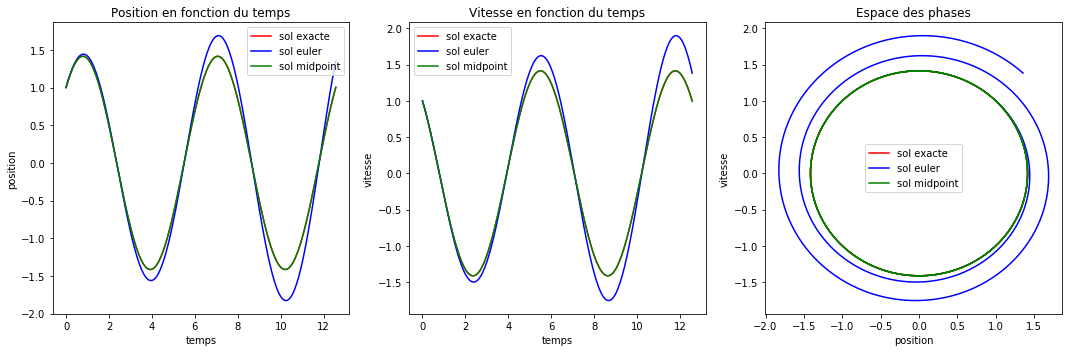

In [21]:
a0 = 1.
a1 = 1.
T = 4 * np.pi
X_init = np.array([a0, a1])
dt = 0.05
N = int(T / dt)
t = np.linspace(0, T, N+1)
X = solexa2(t, a0, a1)
TPS, XEE = EulerExplicite(t0, X_init, T, N, f2)
TPS, XEM = ExplicitMidpoint(t0, X_init, T, N, f2)
plotsol2_3(t, X, XEE, XEM)

Vos observations ici (cellule de type texte)

On remarque que le schéma d'Euler modifié est plus précis que le schéma d'Euler explicite puisqu'avec la même discrétisation on obtient une solution beaucoup plus proche de la solution exacte.

i) Calculer une  solution approchée avec le solveur $scipy.integrate.odeint$.

In [22]:
def plotsol2_4(t, X_exact, X_EE, X_EM, X_ODEINT):
    
    # Get positions and velocities
    pos_exact = X_exact[0]
    vit_exact = X_exact[1]
    pos_euler = [x[0] for x in X_EE]
    vit_euler = [x[1] for x in X_EE]
    pos_midpoint = [x[0] for x in X_EM]
    vit_midpoint = [x[1] for x in X_EM]
    pos_odeint = [x[0] for x in X_ODEINT]
    vit_odeint = [x[1] for x in X_ODEINT]
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # le graphe de la position en fonction du temps
    ax1.plot(t, pos_exact, c='r', label='sol exacte')
    ax1.plot(t, pos_euler, c='b', label='sol euler')
    ax1.plot(t, pos_midpoint, c='g', label='sol midpoint')
    ax1.plot(t, pos_odeint, c='k', label='sol odeint')
    ax1.set_xlabel('temps')
    ax1.set_ylabel('position')
    ax1.set_title('Position en fonction du temps')
    ax1.legend()
    
    # le graphe de la vitesse en fonction du temps
    ax2.plot(t, vit_exact, c='r', label='sol exacte')
    ax2.plot(t, vit_euler, c='b', label='sol euler')
    ax2.plot(t, vit_midpoint, c='g', label='sol midpoint')
    ax2.plot(t, vit_odeint, c='k', label='sol odeint')
    ax2.set_xlabel('temps')
    ax2.set_ylabel('vitesse')
    ax2.set_title('Vitesse en fonction du temps')
    ax2.legend()
    
    #le graphe dans l'espace des phases
    ax3.plot(pos_exact, vit_exact, c='r', label='sol exacte')
    ax3.plot(pos_euler, vit_euler, c='b', label='sol euler')
    ax3.plot(pos_midpoint, vit_midpoint, c='g', label='sol midpoint')
    ax3.plot(pos_odeint, vit_odeint, c='k', label='sol odeint')
    ax3.set_xlabel('position')
    ax3.set_ylabel('vitesse')
    ax3.set_title('Espace des phases')
    ax3.legend()
    
    # Place a legend to the right of this smaller subplot.
    plt.tight_layout()
    plt.show()

Afficher avec les trois solutions précédentes. Là encore on fera attention à la structure de la solution renvoyée par odeint

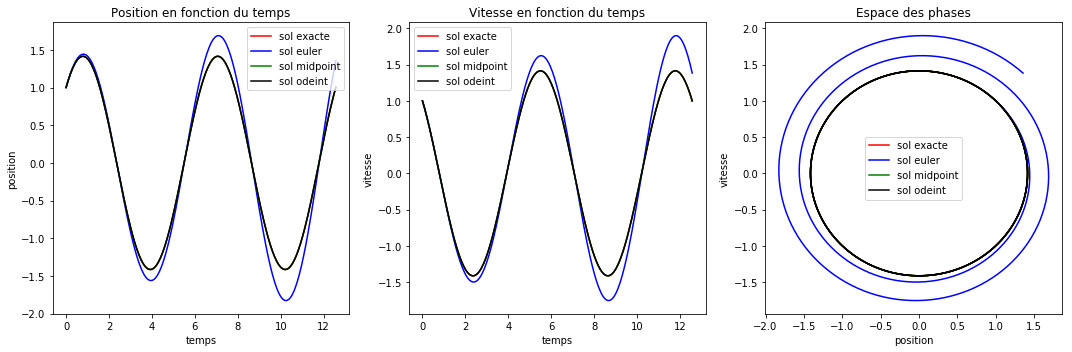

In [23]:
a0 = 1.
a1 = 1.
T = 4*np.pi
X_init = np.array([a0, a1])
dt = 0.05
N = int(T/dt)
t = np.linspace(0, T, N+1)
X = solexa2(t, a0, a1)
TPS, XEE = EulerExplicite(t0, X_init, T, N, f2)
TPS, XEM = ExplicitMidpoint(t0, X_init, T, N, f2)
XODEINT = odeint(f2, X_init, TPS)
plotsol2_4(t, X, XEE, XEM, XODEINT)

j) Sur le graphique dans l'espace des phases, rajouter  à l’aide de la fonction $matplotlib.pyplot.quiver$ la dynamique du problème i.e le champ de vecteur associé à $f$.

Conseil: on pourra regarder la [documentation](https://matplotlib.org/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py).

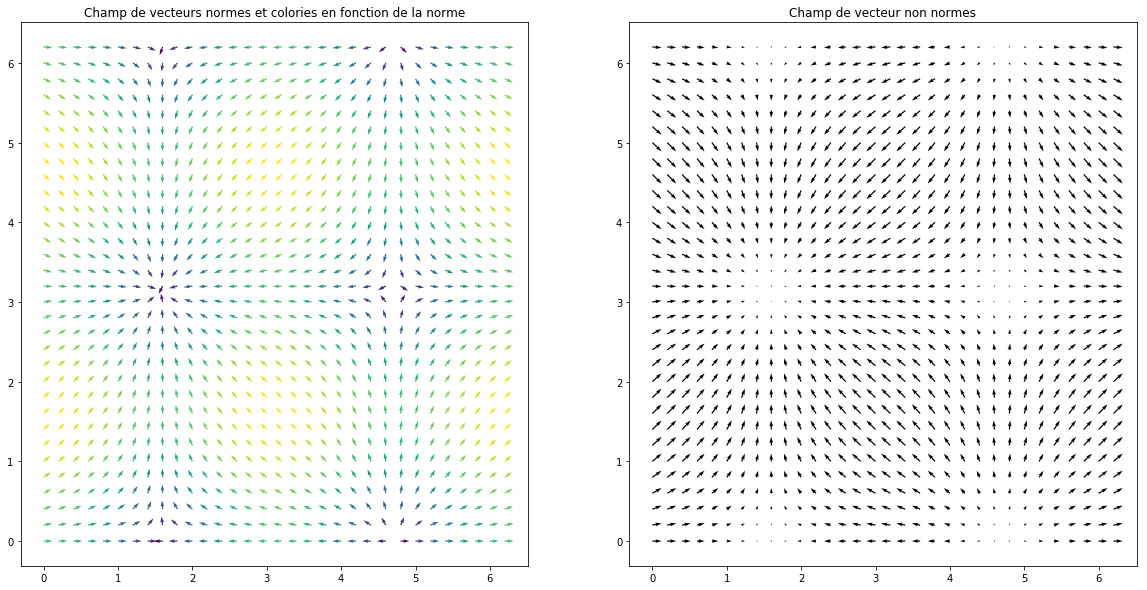

In [24]:
#exemple d'utilisation de quiver

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
# Normalisation des vecteurs
N = np.hypot(U, V) 
Unorm = U / N
Vnorm = V / N

# Le dernier paramètre permet de colorier en fonction de la norme
Q = ax1.quiver(X, Y, Unorm, Vnorm, N)
ax1.set_title('Champ de vecteurs normes et colories en fonction de la norme')

Q2 = ax2.quiver(X, Y, U, V)
ax2.set_title('Champ de vecteur non normes')
plt.show()

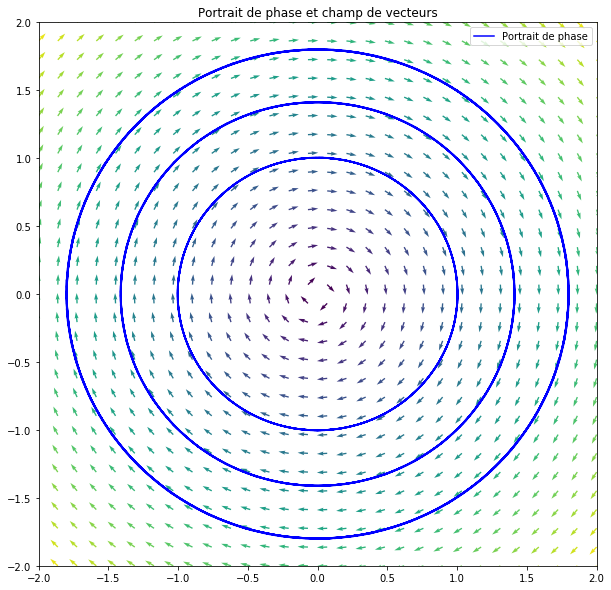

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

#############################
# Mise en place de la grille 
############################

y1 = np.linspace(-2., 2., 30)
y2 = np.linspace(-2., 2., 30)

Y1, Y2 = np.meshgrid(y1, y2)

#####################
# Champ de vecteurs
####################

#Initialisation des vecteurs
U, V = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape

#Calcul 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        U[i, j] = f2([x, y], t)[0]
        V[i, j] = f2([x, y], t)[1]

#Normalisation des vecteurs
N = np.hypot(U, V)
U /= N
V /= N

#Traçons
ax.quiver(Y1, Y2, U, V, N)

####################
# Portrait de phase
####################

l = [0.1, 1, 1.5]   # pour en dessiner plusieurs 
a0 = 1
TPS = np.linspace(0, 50, 300)
for a1 in l:
    X2 = np.array([a0, a1])
    RES = odeint(f2, X2, TPS)
    posRES = RES[:, 0]
    vitRES = RES[:, 1]
    ax.plot(posRES,vitRES, 'b')
    
ax.set_ylim([-2, 2])
ax.set_xlim([-2, 2])    
ax.legend(['Portrait de phase'], loc=1)
plt.title('Portrait de phase et champ de vecteurs')

plt.show()